In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
import io
import requests

# from KaggleAux import predict as ka # see github.com/agconti/kaggleaux for more details

In [4]:
df = pd.read_csv('C:/Users/c708682/Downloads/train.csv')

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [6]:
df = df.drop(['Ticket', 'Cabin'], axis=1)

In [7]:
df = df.dropna()

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,16.7000,S


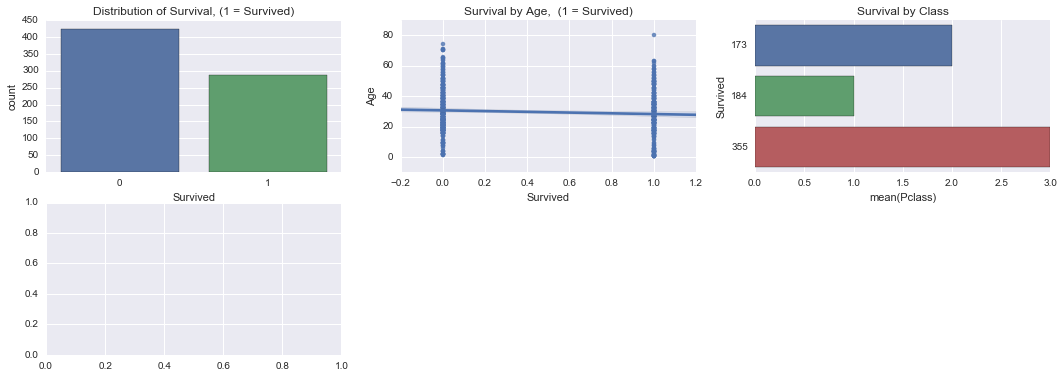

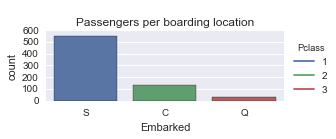

In [24]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600)
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

ax1 = plt.subplot2grid((2,3),(0,0))
plt.subplot2grid((2,3),(0,0))
import seaborn as sns
sns.countplot(x='Survived', data=df, orient='v')
ax1.set_xlim(-1, 2)
plt.title("Distribution of Survival, (1 = Survived)") 

plt.subplot2grid((2,3),(0,1))
sns.regplot(df.Survived, df.Age)
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
Pclass_Surv = df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).count()
sns.barplot(x = 'Pclass', y = 'Survived', data = Pclass_Surv, orient='h')
plt.title("Survival by Class")

Age_class1 = df.Age[df.Pclass == 1]
Age_class2 = df.Age[df.Pclass == 2]
Age_class3 = df.Age[df.Pclass == 3]

plt.subplot2grid((2,3),(1,0),colspan=1)
facet = sns.FacetGrid(df, hue="Pclass",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.title("Age Distribution by Class")

ax5 = plt.subplot2grid((2,3),(1,2))
sns.countplot(x='Embarked', data=df, orient='v')
plt.title("Passengers per boarding location") 

In [11]:
Age_class1 = df.Age[df.Pclass == 1]
Age_class2 = df.Age[df.Pclass == 2]
Age_class3 = df.Age[df.Pclass == 3]


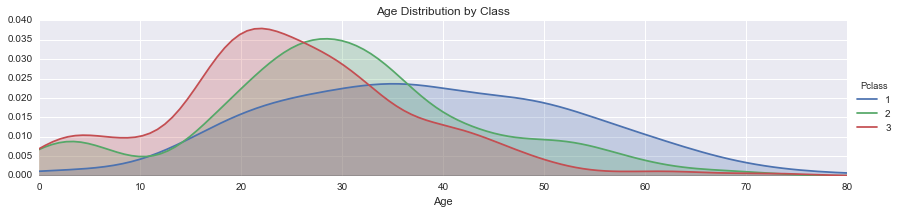

In [12]:
facet = sns.FacetGrid(df, hue="Pclass",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.title("Age Distribution by Class")

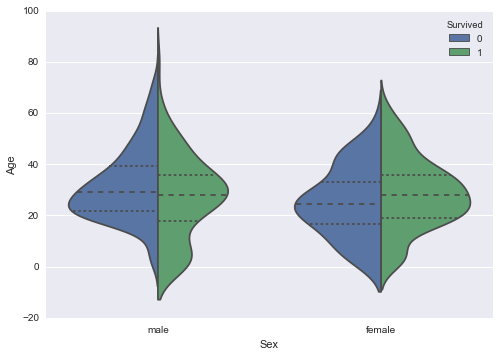

In [13]:
sns.violinplot(y = df.Age, x=df.Sex, hue=df.Survived , split=True, inner="quart" )


C:\Program Files\Anaconda2\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


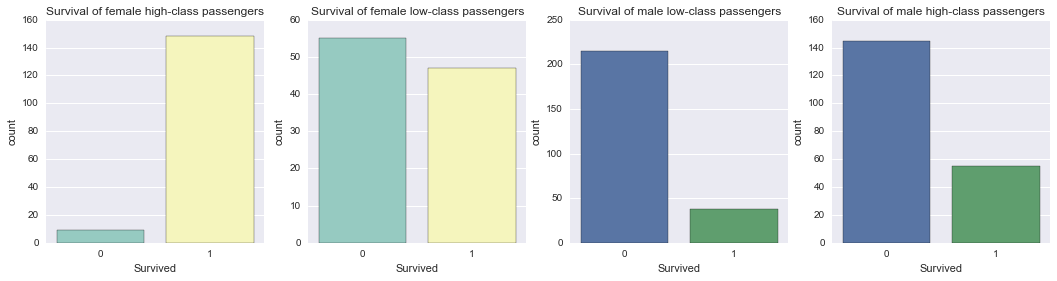

In [14]:
fig = plt.figure(figsize=(18,4), dpi=1600)
alpha_level = 0.65

ax1=fig.add_subplot(141)

sns.countplot(x='Survived', data=df[df.Sex=="female"][df.Pclass!=3], palette="Set3", orient='v')
plt.title("Survival of female high-class passengers")

ax2=fig.add_subplot(142)

sns.countplot(x='Survived', data=df[df.Sex=="female"][df.Pclass==3], palette="Set3", orient='v')
plt.title("Survival of female low-class passengers")

ax2=fig.add_subplot(143)

sns.countplot(x='Survived', data=df[df.Sex=="male"][df.Pclass==3], orient='v')
plt.title("Survival of male low-class passengers")

ax2=fig.add_subplot(144)

sns.countplot(x='Survived', data=df[df.Sex=="male"][df.Pclass!=3], orient='v')
plt.title("Survival of male high-class passengers")

In [26]:
# model formula
# here the ~ sign is an = sign, and the features of our dataset
# are written as a formula to predict survived. The C() lets our 
# regression know that those variables are categorical.
# Ref: http://patsy.readthedocs.org/en/latest/formulas.html
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked)' 
# create a results dictionary to hold our regression results for easy analysis later        
results = {} 


In [27]:
# create a regression friendly dataframe using patsy's dmatrices function
y, X = dmatrices(formula, data=df, return_type='dataframe')
# instantiate our model
model = sm.Logit(y, X)
# fit our model to the training data
res = model.fit()
# save the result for outputing predictions later
results['Logit'] = [res, formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.444388
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Fri, 17 Mar 2017   Pseudo R-squ.:                  0.3414
Time:                        07:47:47   Log-Likelihood:                -316.40
converged:                       True   LL-Null:                       -480.45
                                        LLR p-value:                 5.992e-67
====================================================================================
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            4.5423      0.474      9.583      0.000         3.613     5.471
C(Pclass)[T.2]      -1.2673      0.299     -4.245      0.000        -1.852    -0.682
C(Pclass)[T.3]      -2.4966      0.296     -8.422      0.000        -3.078    -1.916
C(Sex)[T.male]      -2.6239      0.218    -12.060      0.000        -3.050    -2.197
C(Embarked)[T.Q]    -0.8351      0.597     -1.398      0.162        -2.006     0.335
C(Embarked)[T.S]    -0.4254      0.271     -1.572      0.116        -0.956     0.105
Age                 -0.0436      0.008     -5.264      0.000        -0.060    -0.027
SibSp               -0.3697      0.123     -3.004      0.003        -0.611    -0.129
====================================================================================
"""

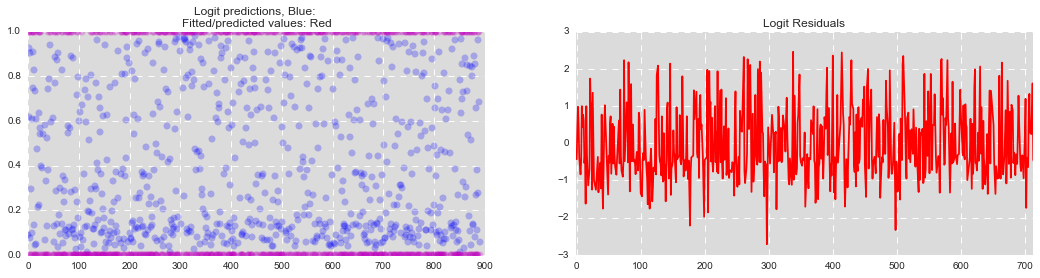

In [30]:
# Plot Predictions Vs Actual
plt.figure(figsize=(18,4));
plt.subplot(121, axisbg="#DBDBDB")
# generate predictions from our fitted model
ypred = res.predict(X)
plt.plot(X.index, ypred, 'bo', X.index, y, 'mo', alpha=.25);
plt.grid(color='white', linestyle='dashed')
plt.title('Logit predictions, Blue: \nFitted/predicted values: Red');

# Residuals
ax2 = plt.subplot(122, axisbg="#DBDBDB")
plt.plot(res.resid_dev, 'r-')
plt.grid(color='white', linestyle='dashed')
ax2.set_xlim(-1, len(res.resid_dev))
plt.title('Logit Residuals');

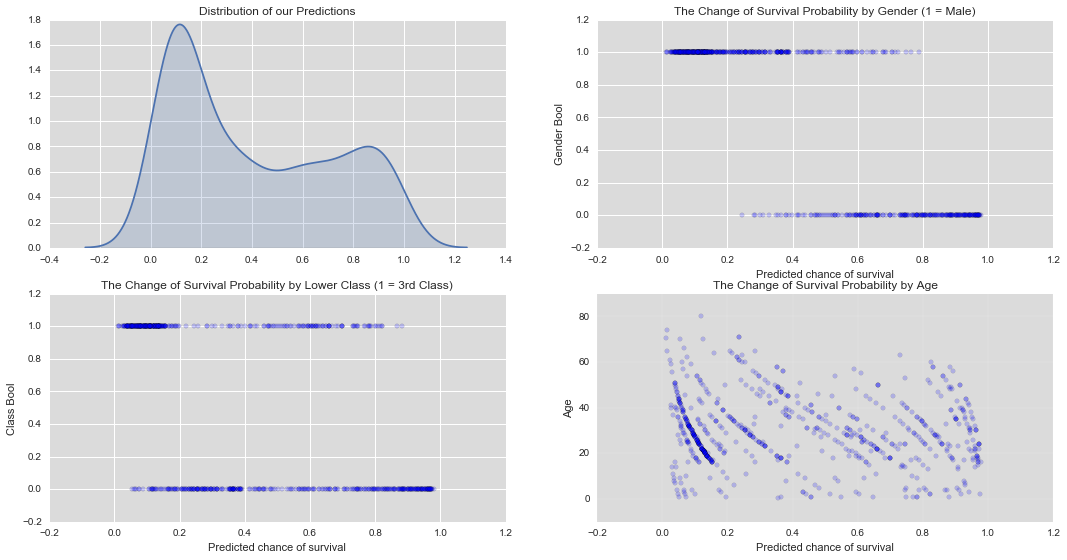

In [32]:
fig = plt.figure(figsize=(18,9), dpi=1600)
a = .2

# Below are examples of more advanced plotting. 
# It it looks strange check out the tutorial above.
fig.add_subplot(221, axisbg="#DBDBDB")
kde_res = KDEUnivariate(res.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=a)
plt.title("Distribution of our Predictions")

fig.add_subplot(222, axisbg="#DBDBDB")
plt.scatter(res.predict(),X['C(Sex)[T.male]'] , alpha=a)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted chance of survival")
plt.ylabel("Gender Bool")
plt.title("The Change of Survival Probability by Gender (1 = Male)")

fig.add_subplot(223, axisbg="#DBDBDB")
plt.scatter(res.predict(),X['C(Pclass)[T.3]'] , alpha=a)
plt.xlabel("Predicted chance of survival")
plt.ylabel("Class Bool")
plt.grid(b=True, which='major', axis='X')
plt.title("The Change of Survival Probability by Lower Class (1 = 3rd Class)")

fig.add_subplot(224, axisbg="#DBDBDB")
plt.scatter(res.predict(),X.Age , alpha=a)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Age")
plt.xlabel("Predicted chance of survival")
plt.ylabel("Age")

In [34]:
test_data = pd.read_csv('C:/Users/c708682/Downloads/test.csv')

In [35]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [36]:
test_data['Survived'] = 1.23

In [37]:
results 

{'Logit': [<statsmodels.discrete.discrete_model.BinaryResultsWrapper at 0xd8e81d0>,
  'Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked)']}

In [63]:
# Use your model to make prediction on our test set. 
compared_results = res.predict(test_data,  'Logit')
compared_results = Series(compared_resuts)  # convert our model to a series for easy output


In [66]:
solution = pd.DataFrame({'PassengerId' : test_data.PassengerId, 
                         'Survived' : compared_results})
solution['Survived'] =  np.where(solution['Survived'] < 0.5, 0,1)
solution.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [67]:
# output and submit to kaggle
solution.to_csv('C:/Users/c708682/Downloads/submission1.csv', sep=',', header=True, index=False)

Prediction funktioniert noch nicht


In [68]:
# Create an acceptable formula for our machine learning algorithms
formula_ml = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)'


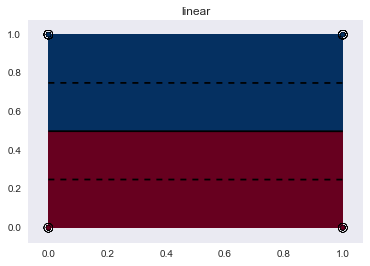

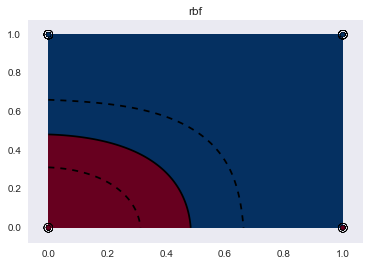

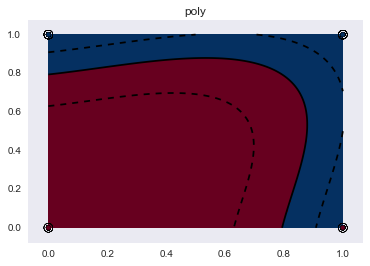

In [71]:
# set plotting parameters
plt.figure(figsize=(8,6))

# create a regression friendly data frame
y, x = dmatrices(formula_ml, data=df, return_type='matrix')

# select which features we would like to analyze
# try chaning the selection here for diffrent output.
# Choose : [2,3] - pretty sweet DBs [3,1] --standard DBs [7,3] -very cool DBs,
# [3,6] -- very long complex dbs, could take over an hour to calculate! 
feature_1 = 2
feature_2 = 3

X = np.asarray(x)
X = X[:,[feature_1, feature_2]]  


y = np.asarray(y)
# needs to be 1 dimenstional so we flatten. it comes out of dmatirces with a shape. 
y = y.flatten()      

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)

X = X[order]
y = y[order].astype(np.float)

# do a cross validation
ninety_precent_of_sample = int(.9 * n_sample)
X_train = X[:ninety_precent_of_sample]
y_train = y[:ninety_precent_of_sample]
X_test = X[ninety_precent_of_sample:]
y_test = y[ninety_precent_of_sample:]

# create a list of the types of kernels we will use for your analysis
types_of_kernels = ['linear', 'rbf', 'poly']

# specify our color map for plotting the results
color_map = plt.cm.RdBu_r

# fit the model
for fig_num, kernel in enumerate(types_of_kernels):
    clf = svm.SVC(kernel=kernel, gamma=3)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=color_map)

    # circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)
    
    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=color_map)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
               levels=[-.5, 0, .5])

    plt.title(kernel)
    plt.show()

In [88]:
# import the machine learning library that holds the randomforest
import sklearn.ensemble as ske

# Create the random forest model and fit the model to our training data
y, x = dmatrices(formula_ml, data=df, return_type='dataframe')
# RandomForestClassifier expects a 1 demensional NumPy array, so we convert
y = np.asarray(y).ravel()
#instantiate and fit our model
results_rf = ske.RandomForestClassifier(n_estimators=100).fit(x, y)

# Score the results
score = results_rf.score(x, y)
print "Mean accuracy of Random Forest Predictions on the data was: {0}".format(score)

Mean accuracy of Random Forest Predictions on the data was: 0.945224719101
